In [1]:
import pandas as pd
import pickle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import chi2_contingency
import scipy.stats as stats
from math import log10, log2

def ICD10_code_to_chapter(let):
    if let == 'nan':
        return 'NaN';
    elif let[0] == 'A' or let[0] == 'B':
        return 'A00–B99';
    elif let[0] == 'C' or (let[0] == 'D' and int(let[1])>=0 and int(let[1])<5):
        return 'C00–D48';
    elif let[0] == 'D' and int(let[1])>=5 and int(let[1])<9:
        return 'D50–D89';
    elif let[0] == 'E':
        return 'E00–E90';
    elif let[0] == 'H' and int(let[1])>=0 and int(let[1])<6:
        return 'H00–H59';
    elif let[0] == 'H' and int(let[1])>=6 and int(let[1])<=9:
        return 'H60–H95';
    elif let[0] == 'K':
        return 'K00–K93';
    elif let[0] == 'P':
        return 'P00–P96';
    elif let[0] == 'S' or let[0] == 'T':
        return 'S00–T98';
    elif let[0] in ['V','W','X','Y']:
        return 'V01–Y98';
    elif let[0] in ['F', 'G','I', 'J', 'L', 'M', 'N', 'O','Q','R','Z','U']:
        return '{}00–{}99'.format(let[0], let[0]);
    else:
        return let;
    
def ICDchapter_to_name(chp):
    if chp == 'nan': return 'NaN';
    elif chp == 'A00–B99': return 'Infectious';
    elif chp == 'C00–D48': return 'Neoplasms';
    elif chp == 'D50–D89': return 'Blood-Related Disorders';
    elif chp == 'E00–E90': return 'Endocrine, Nutritional and Metabolic Disorders';
    elif chp == 'F00–F99': return 'Mental and Behavioural Disorders';
    elif chp == 'G00–G99': return 'Diseases of Nervous System';
    elif chp == 'H00–H59': return 'Diseases of Eye and Adnexa';
    elif chp == 'H60–H95': return 'Diseases of Ear and Mastoid process';
    elif chp == 'I00–I99': return 'Diseases of Circulatory System';
    elif chp == 'J00–J99': return 'Diseases of Respiratory System';
    elif chp == 'K00–K93': return 'Diseases of Digestive System';
    elif chp == 'L00–L99': return 'Diseases of Skin and Subcutaneous Tissue';
    elif chp == 'M00–M99': return 'Musculoskeletal System Diseases';
    elif chp == 'N00–N99': return 'Genitourinary System Diseases';
    elif chp == 'O00–O99': return 'Pregnancy and Childbirth';
    elif chp == 'P00–P96': return 'Perinatal Diseases';
    elif chp == 'Q00–Q99': return 'Congenital Diseases';
    elif chp == 'R00–R99': return 'Abnormal Clinical and Lab Findings';
    elif chp == 'S00–T98': return 'Injury, Poisoning and External Issues';
    elif chp == 'V01–Y98': return 'External Causes';
    elif chp == 'Z00–Z99': return 'Health Status and Services';
    elif chp == 'U00–U99': return 'Codes for special purposes';
    else: return ' ';

In [3]:
positive = pd.read_csv('upset_df_AD_diagnosis_ICDfull_positive_male.csv')

In [4]:
positive['sum'] = positive[['c0', 'c1', 'c2', 'c3', 'c4']].sum(axis=1)

In [5]:
positive = positive[positive['sum']==1]

In [6]:
negative = pd.read_csv('upset_df_AD_diagnosis_ICDfull_negative_male_revised.csv')

In [7]:
negative['sum'] = negative[['c0', 'c3', 'c4']].sum(axis=1)

In [8]:
negative = negative[negative['sum']==1]

In [9]:
specific_icd = pd.concat([positive, negative], axis=0, ignore_index=True)

In [10]:
# c0-c4列をobject型に変換
columns_to_convert = ['c0', 'c1', 'c2', 'c3', 'c4']
specific_icd[columns_to_convert] = specific_icd[columns_to_convert].astype(str)

In [11]:
# ファイル名とデータを格納する辞書を用意
data_dict = {}

# c0からc4までのファイルをループで読み込み、Cluster列を追加
for i in range(5):
    file_name = f'c{i}_label_positions_AD_ICD10_male_volcano.csv'  # ファイル形式をCSVに変更
    try:
        # CSVファイルを読み込む
        df = pd.read_csv(file_name)
        
        # Cluster列を追加して値を設定
        df['Cluster'] = i
        
        # 辞書にデータフレームを保存
        data_dict[f'c{i}'] = df
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    except pd.errors.EmptyDataError:
        print(f"Empty file or no data: {file_name}")
    except Exception as e:
        print(f"An error occurred while processing {file_name}: {e}")

In [12]:
# 辞書内のデータフレームをすべて縦に結合
combined_df = pd.concat(data_dict.values(), ignore_index=False)

In [13]:
combined_df

,Label,X,Y,ICD10_chape,flag,mapping,Cluster
0,I10,-3.702396,163.477848,['I00–I99'],0,Essential (primary) hypertension,0
1,F02.80,-0.851923,13.275927,['F00–F99'],1,Dementia in other diseases classified elsewhere,0
2,F03.90,-2.221039,81.769376,['F00–F99'],0,Unspecified dementia,0
3,R41.3,-1.187196,21.961599,['R00–R99'],0,NaN,0
4,E78.5,-2.905704,131.004384,['E00–E90'],0,Disorders of lipoprotein metabolism and other ...,0
...,...,...,...,...,...,...,...
74,S72.143A,2.597886,5.539923,['S00–T98'],0,NaN,4
75,R13.1,3.176077,5.498781,['R00–R99'],0,NaN,4
76,G93.41,-2.877736,5.348716,['G00–G99'],0,NaN,4
77,H61.23,-4.177219,5.588180,['H60–H95'],0,NaN,4


In [14]:
specific_data = combined_df

In [15]:
# 'IMO' を含むレコードを削除
specific_data = specific_data[~specific_data['Label'].str.contains('IMO', na=False)]

In [16]:
# ICD-10コード順に並べ替え
specific_data = specific_data.sort_values(by='ICD10_chape')

In [17]:
specific_data['ICD10_chape'] = specific_data['ICD10_chape'].str.strip("[]'")

# Count the number of ICD in each cluster

In [18]:
# ファイル名とデータを格納する辞書を用意
data_dict = {}

# c0からc4までのファイルをループで読み込み、Cluster列を追加
for i in range(5):
    file_name = f'all_diagnosis_stats_c{i}_other_AD_male.pickle'
    with open(file_name, 'rb') as file:
        data = pickle.load(file)
        df = pd.DataFrame(data['ICD10'])  # データをデータフレームに変換
        df['Cluster'] = i  # Cluster列を追加して値を設定
        data_dict[f'c{i}'] = df  # 辞書に保存

In [19]:
# 辞書内のデータフレームをすべて縦に結合
combined_df = pd.concat(data_dict.values(), ignore_index=False)

In [20]:
all_data = combined_df[['-log_pvalue','pvalue','OddsRatio','Cluster']]

In [21]:
all_data = all_data.reset_index()

In [22]:
all_data['ICD10_chape'] = all_data['ICD10'].apply(lambda x: ICD10_code_to_chapter(str(x)[0:3])) # Get ICD10 Chapte

In [23]:
all_data['ICD10_chape_name'] = all_data['ICD10_chape'].apply(lambda x: ICDchapter_to_name(x))

In [24]:
# 'IMO' を含むレコードを削除
all_data = all_data[~all_data['ICD10'].str.contains('IMO', na=False)]

In [25]:
c0 = all_data[all_data['Cluster']==0]
c1 = all_data[all_data['Cluster']==1]
c2 = all_data[all_data['Cluster']==2]
c3 = all_data[all_data['Cluster']==3]
c4 = all_data[all_data['Cluster']==4]

In [26]:
all_data

,ICD10,-log_pvalue,pvalue,OddsRatio,Cluster,ICD10_chape,ICD10_chape_name
0,I10,163.477848,3.327761e-164,0.076819,0,I00–I99,Diseases of Circulatory System
1,F02.80,13.275927,5.297519e-14,0.554046,0,F00–F99,Mental and Behavioural Disorders
2,F03.90,81.769376,1.700687e-82,0.214487,0,F00–F99,Mental and Behavioural Disorders
3,R41.3,21.961599,1.092449e-22,0.439156,0,R00–R99,Abnormal Clinical and Lab Findings
4,E78.5,131.004384,9.899564e-132,0.133443,0,E00–E90,"Endocrine, Nutritional and Metabolic Disorders"
...,...,...,...,...,...,...,...
34760,Z65.3,-0.000000,1.000000e+00,0.000000,4,Z00–Z99,Health Status and Services
34761,T43.501A,-0.000000,1.000000e+00,0.000000,4,S00–T98,"Injury, Poisoning and External Issues"
34762,H61.92,-0.000000,1.000000e+00,0.000000,4,H60–H95,Diseases of Ear and Mastoid process
34763,S76.312S,-0.000000,1.000000e+00,0.000000,4,S00–T98,"Injury, Poisoning and External Issues"


In [27]:
specific_data

,Label,X,Y,ICD10_chape,flag,mapping,Cluster
465,B96.20,3.713217,17.430623,A00–B99,0,NaN,1
809,A49.8,-4.750562,10.487593,A00–B99,0,NaN,0
595,B99.9,-4.408470,18.936999,A00–B99,0,NaN,0
787,A41.50,3.688902,8.484996,A00–B99,0,NaN,1
26,A41.9,2.775421,49.585963,A00–B99,0,NaN,3
...,...,...,...,...,...,...,...
307,Z13.6,2.889372,15.408781,Z00–Z99,0,NaN,1
834,Z98.89,-4.513488,8.714208,Z00–Z99,0,NaN,0
753,Z83.3,3.299892,6.745477,Z00–Z99,0,NaN,1
837,Z48.812,-4.750562,10.487593,Z00–Z99,0,NaN,0


In [28]:
ORs = all_data[all_data['ICD10'].isin(specific_data['Label'])]

In [29]:
# ピボットテーブルを作成
pivot_df = ORs.pivot_table(index='ICD10',columns='Cluster', values='OddsRatio')

In [30]:
pivot_df.columns = [f'Cluster {int(col)}' for col in pivot_df.columns]

In [31]:
pivot_df = pivot_df.reset_index()

In [32]:
pivot_df

,ICD10,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,A04.7,0.000000,4.454128,0.000000,55.464407,0.000000
1,A04.72,0.121212,2.125676,2.772414,4.352679,2.199141
2,A04.8,0.093750,6.331350,7.755495,1.379505,1.588217
3,A41.50,0.028097,12.896450,0.878647,12.896552,0.000000
4,A41.51,0.091729,12.640523,1.322566,4.110732,1.076246
...,...,...,...,...,...,...
1282,Z98.890,0.151338,10.124807,2.469659,5.892918,0.515147
1283,Z99.11,0.077308,4.198839,1.771500,8.268293,1.185219
1284,Z99.3,0.027611,10.325000,1.362712,9.606383,0.693142
1285,Z99.81,0.074622,4.983673,4.113821,5.381174,1.225097


In [33]:
pivot_df['ICD_chape'] = pivot_df['ICD10'].apply(lambda x: ICD10_code_to_chapter(str(x)[0:3]))

In [34]:
# 絶対値が最も大きいクラスターの番号を取得
pivot_df["Specific Cluster"] = pivot_df[["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]].abs().idxmax(axis=1)

# クラスター番号に "Cluster " を追加
pivot_df["Specific Cluster"] = pivot_df["Specific Cluster"].apply(lambda x: f"{x}")

# 最大値を新しいカラム maxOR に追加
pivot_df["maxOR"] = pivot_df[["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]].abs().max(axis=1)



In [35]:
pivot_df

,ICD10,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,ICD_chape,Specific Cluster,maxOR
0,A04.7,0.000000,4.454128,0.000000,55.464407,0.000000,A00–B99,Cluster 3,55.464407
1,A04.72,0.121212,2.125676,2.772414,4.352679,2.199141,A00–B99,Cluster 3,4.352679
2,A04.8,0.093750,6.331350,7.755495,1.379505,1.588217,A00–B99,Cluster 2,7.755495
3,A41.50,0.028097,12.896450,0.878647,12.896552,0.000000,A00–B99,Cluster 3,12.896552
4,A41.51,0.091729,12.640523,1.322566,4.110732,1.076246,A00–B99,Cluster 1,12.640523
...,...,...,...,...,...,...,...,...,...
1282,Z98.890,0.151338,10.124807,2.469659,5.892918,0.515147,Z00–Z99,Cluster 1,10.124807
1283,Z99.11,0.077308,4.198839,1.771500,8.268293,1.185219,Z00–Z99,Cluster 3,8.268293
1284,Z99.3,0.027611,10.325000,1.362712,9.606383,0.693142,Z00–Z99,Cluster 1,10.325000
1285,Z99.81,0.074622,4.983673,4.113821,5.381174,1.225097,Z00–Z99,Cluster 3,5.381174


# Standardization

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
pivot_df.iloc[:, 1:6]

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,0.000000,4.454128,0.000000,55.464407,0.000000
1,0.121212,2.125676,2.772414,4.352679,2.199141
2,0.093750,6.331350,7.755495,1.379505,1.588217
3,0.028097,12.896450,0.878647,12.896552,0.000000
4,0.091729,12.640523,1.322566,4.110732,1.076246
...,...,...,...,...,...
1282,0.151338,10.124807,2.469659,5.892918,0.515147
1283,0.077308,4.198839,1.771500,8.268293,1.185219
1284,0.027611,10.325000,1.362712,9.606383,0.693142
1285,0.074622,4.983673,4.113821,5.381174,1.225097


In [38]:
# OR値の部分を標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_df.iloc[:, 1:6])

# 結果をデータフレームに変換
standardized_df = pd.DataFrame(scaled_data,columns=pivot_df.columns[1:6])

In [39]:
standardized_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,-0.719929,-0.519996,-1.107816,10.508450,-1.067024
1,0.114476,-0.644150,-0.520033,0.162141,0.845423
2,-0.074569,-0.419901,0.536435,-0.439705,0.314143
3,-0.526511,-0.069846,-0.921533,1.891638,-1.067024
4,-0.088482,-0.083492,-0.827417,0.113165,-0.131084
...,...,...,...,...,...
1282,0.321856,-0.217631,-0.584221,0.473925,-0.619035
1283,-0.187750,-0.533608,-0.732238,0.954761,-0.036318
1284,-0.529860,-0.206957,-0.818906,1.225624,-0.464245
1285,-0.206245,-0.491760,-0.235640,0.370335,-0.001639


In [40]:
umap_df = pd.concat([pivot_df[['ICD10','ICD_chape','Specific Cluster','maxOR']],standardized_df], axis=1)

In [41]:
umap_df

,ICD10,ICD_chape,Specific Cluster,maxOR,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,A04.7,A00–B99,Cluster 3,55.464407,-0.719929,-0.519996,-1.107816,10.508450,-1.067024
1,A04.72,A00–B99,Cluster 3,4.352679,0.114476,-0.644150,-0.520033,0.162141,0.845423
2,A04.8,A00–B99,Cluster 2,7.755495,-0.074569,-0.419901,0.536435,-0.439705,0.314143
3,A41.50,A00–B99,Cluster 3,12.896552,-0.526511,-0.069846,-0.921533,1.891638,-1.067024
4,A41.51,A00–B99,Cluster 1,12.640523,-0.088482,-0.083492,-0.827417,0.113165,-0.131084
...,...,...,...,...,...,...,...,...,...
1282,Z98.890,Z00–Z99,Cluster 1,10.124807,0.321856,-0.217631,-0.584221,0.473925,-0.619035
1283,Z99.11,Z00–Z99,Cluster 3,8.268293,-0.187750,-0.533608,-0.732238,0.954761,-0.036318
1284,Z99.3,Z00–Z99,Cluster 1,10.325000,-0.529860,-0.206957,-0.818906,1.225624,-0.464245
1285,Z99.81,Z00–Z99,Cluster 3,5.381174,-0.206245,-0.491760,-0.235640,0.370335,-0.001639


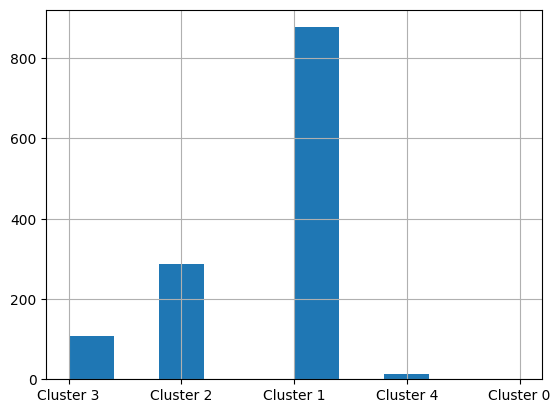

In [42]:
umap_df['Specific Cluster'].hist()
plt.show()

In [43]:
umap_df['Specific Cluster'].describe()

count          1287
unique            5
top       Cluster 1
freq            877
Name: Specific Cluster, dtype: object

# UMAP

In [44]:
import umap

In [45]:
umap_df.iloc[:, 4:]

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,-0.719929,-0.519996,-1.107816,10.508450,-1.067024
1,0.114476,-0.644150,-0.520033,0.162141,0.845423
2,-0.074569,-0.419901,0.536435,-0.439705,0.314143
3,-0.526511,-0.069846,-0.921533,1.891638,-1.067024
4,-0.088482,-0.083492,-0.827417,0.113165,-0.131084
...,...,...,...,...,...
1282,0.321856,-0.217631,-0.584221,0.473925,-0.619035
1283,-0.187750,-0.533608,-0.732238,0.954761,-0.036318
1284,-0.529860,-0.206957,-0.818906,1.225624,-0.464245
1285,-0.206245,-0.491760,-0.235640,0.370335,-0.001639


In [46]:
X = umap_df.iloc[:, 4:]

In [47]:
y = umap_df['ICD_chape']

In [48]:
umap_reducer = umap.UMAP(n_neighbors=10, min_dist=0.5, random_state=42)
reduced_data = umap_reducer.fit_transform(X)

/wynton/protected/home/sirota/ykatsuhara/.local/lib/python3.7/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [49]:
reduced_data

array([[ 1.3167638 , -5.9317136 ],
       [-2.4338803 ,  6.694066  ],
       [ 0.57534975,  9.295931  ],
       ...,
       [ 1.5084491 , -1.2684016 ],
       [ 0.08551168,  5.4408536 ],
       [-4.861588  ,  1.5798123 ]], dtype=float32)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
umap_df.columns[1:]

Index(['ICD_chape', 'Specific Cluster', 'maxOR', 'Cluster 0', 'Cluster 1',
       'Cluster 2', 'Cluster 3', 'Cluster 4'],
      dtype='object')

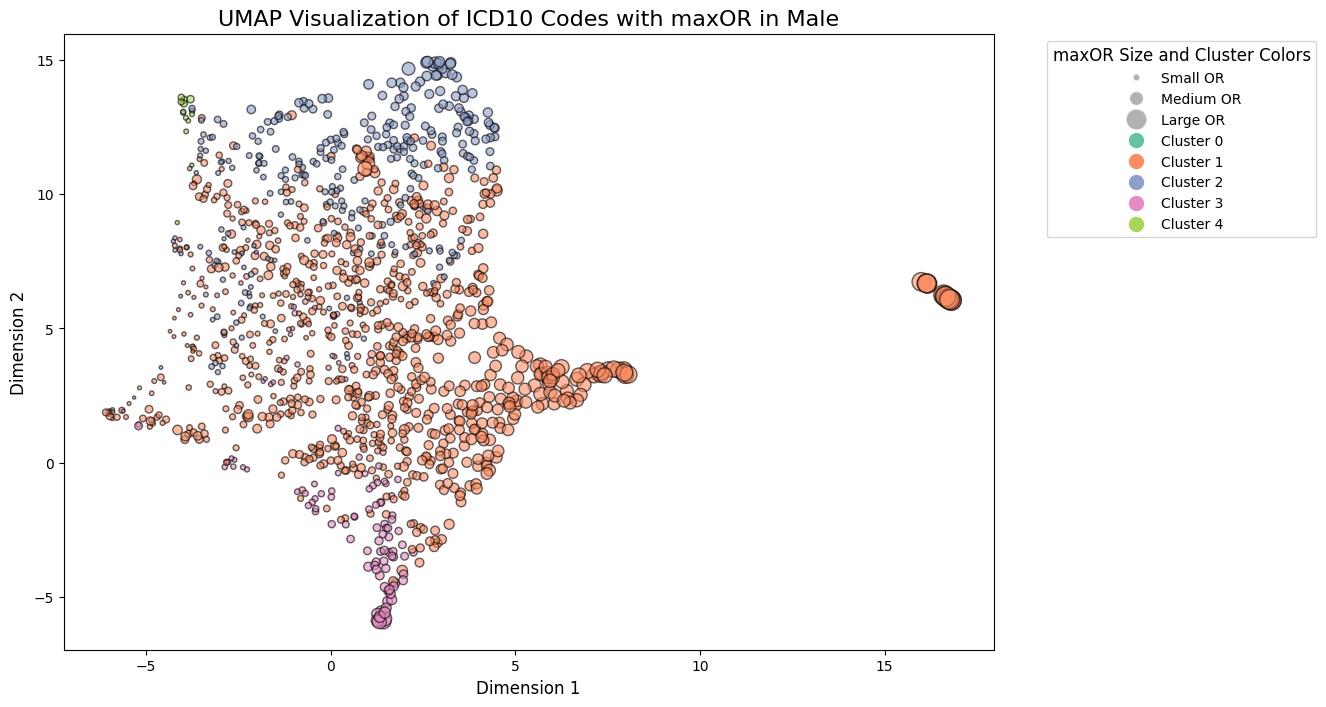

In [52]:
category_color_mapping = {
    'Cluster 0': '#66c2a5',  # 明るいオレンジレッド
    'Cluster 1': '#fc8d62',  # ダークレッド
    'Cluster 2': '#8da0cb',  # 青 - 明るめで視認性高い
    'Cluster 3': '#e78ac3',  # 緑 - 落ち着いた鮮やかさ
    'Cluster 4': '#a6d854',  # 黄 - 明るく視認性の高い色
}
# プロット順序をランダム化
np.random.seed(42)
reordered_indices = np.arange(reduced_data.shape[0])
np.random.shuffle(reordered_indices)

# カラーマッピング
colors = [category_color_mapping.get(icd, '#000000') for icd in umap_df["Specific Cluster"]]

# 対数変換 + 平滑化 + スケーリング
scaled_dot_sizes = (np.log1p(umap_df["maxOR"].values) ** 3.0)  # 対数変換と強調を組み合わせ
scaled_dot_sizes = (scaled_dot_sizes - scaled_dot_sizes.min()) / (scaled_dot_sizes.max() - scaled_dot_sizes.min()) * 200
scaled_dot_sizes += 5  # 最小サイズを確保

# プロット
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    reduced_data[reordered_indices, 0],
    reduced_data[reordered_indices, 1],
    c=np.array(colors)[reordered_indices],  # 各ICD10に対応する色を指定
    s=scaled_dot_sizes[reordered_indices],  # ドットサイズをmaxORに基づいて設定
    alpha=0.6,
    edgecolor='k'  # 境界線を黒に設定
)

# サイズ凡例の作成
size_legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Small OR', markersize=5, markerfacecolor='gray', alpha=0.6),
    plt.Line2D([0], [0], marker='o', color='w', label='Medium OR', markersize=10, markerfacecolor='gray', alpha=0.6),
    plt.Line2D([0], [0], marker='o', color='w', label='Large OR', markersize=15, markerfacecolor='gray', alpha=0.6),
]

# 色凡例の作成
color_legend_elements = [
    plt.Line2D([0], [0], marker='o', color=color, label=cluster, markersize=10, linestyle='None')
    for cluster, color in category_color_mapping.items()
]

# 凡例を追加
plt.legend(
    handles=size_legend_elements + color_legend_elements,
    title="maxOR Size and Cluster Colors",
    fontsize=10,
    loc='upper left',  # 凡例の基準位置（左上を基準）
    bbox_to_anchor=(1.05, 1),  # プロット枠外に配置 (右上)
    title_fontsize=12
)

# グラフの設定
plt.title("UMAP Visualization of ICD10 Codes with maxOR in Male", fontsize=16)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.show()

In [53]:
reduced_df = pd.DataFrame(reduced_data, columns=['X','Y'])

In [54]:
df = pd.concat([pivot_df[['ICD10','ICD_chape','Specific Cluster','maxOR']],reduced_df], axis=1)

In [55]:
df.to_csv('UMAP_OR_male.csv', index=False)

In [57]:
df[df['Specific Cluster']=='Cluster 4'].sort_values('X').head(20)

,ICD10,ICD_chape,Specific Cluster,maxOR,X,Y
202,G21.9,G00–G99,Cluster 4,3.653023,-5.179519,2.785548
187,F29,F00–F99,Cluster 4,3.893438,-4.157563,8.946254
663,L89.109,L00–L99,Cluster 4,8.007674,-4.051658,13.441251
899,R13.1,R00–R99,Cluster 4,9.038462,-4.047802,13.611259
1080,S72.143A,S00–T98,Cluster 4,6.053991,-3.996891,13.074059
71,D49.9,C00–D48,Cluster 4,10.504060,-3.977664,13.381438
109,E11.01,E00–E90,Cluster 4,10.504060,-3.968640,13.520654
457,I69.959,I00–I99,Cluster 4,5.347750,-3.925022,12.853265
766,M62.9,M00–M99,Cluster 4,5.021417,-3.916917,12.344319
1167,Z45.02,Z00–Z99,Cluster 4,5.021417,-3.860152,12.744884
